In [1]:
from MCM_functions import *
from data_functions import *
from measure_functions import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

## Tests

In [2]:
n = 120

Nset, N = read_data('INPUT/sampled.dat', n)

Kset = Nset
MCM, logE = merging(Kset, N, n)
logL = log_likelihood_MCM(Kset, MCM, N)

print(f'log-evidence    : {logE}')
print(f'log-likelihood  : {logL}')
print_partition(MCM, n)

log-evidence    : -767273.8132929376
log-likelihood  : -749830.8934621395
com 0	000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100011111001001000101001
com 1	000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000110110111010110
com 20	001000010000001000000000000000100000000000000000000000011000000000000000000000100000001000010000000100000000000000000000
com 21	000000000000000000000000000000000000100000000000000011000000001010000000000101010000000000000010001000000000000000000000
com 24	000000000000000000000000000000000000000000000000000000000000000000000100000010001100110101101001000000000000000000000000
com 26	000000000000100000000000000001000000000000000000000100000001000000000011001000000001000010000100000000000000000000000000
com 37	010000000000000000000010000010000000000000100100001000000000000000000000000000000010000000000000000000000000000000000000
com 46	0000000000000001001100000

# Compare to 'true' partition

In [3]:
## Path and files
path = "INPUT/"
n_file = 'network.dat'
c_file = 'community.dat'

## Read community
comm = pd.read_csv(path + c_file, sep = '\t', index_col = 0, header = None)

## Restore binary representation
true_com = restore_partition("_".join(comm.astype(str)[1].tolist()), n)

## Print VOI and NMI
print(f'Variation of Information      : {var_of_info(MCM, true_com, n)}')
print(f'Normalized Mutual Information : {norm_mut_info(MCM, true_com, n)}')

Variation of Information      : 0.3003597854734815
Normalized Mutual Information : 0.8232803725715828


# Network from which binary data has been generated
* vertices have been interpreted as spin variables
* edges have been interpreted as 2nd-order interactions ($\phi = s_is_j$)

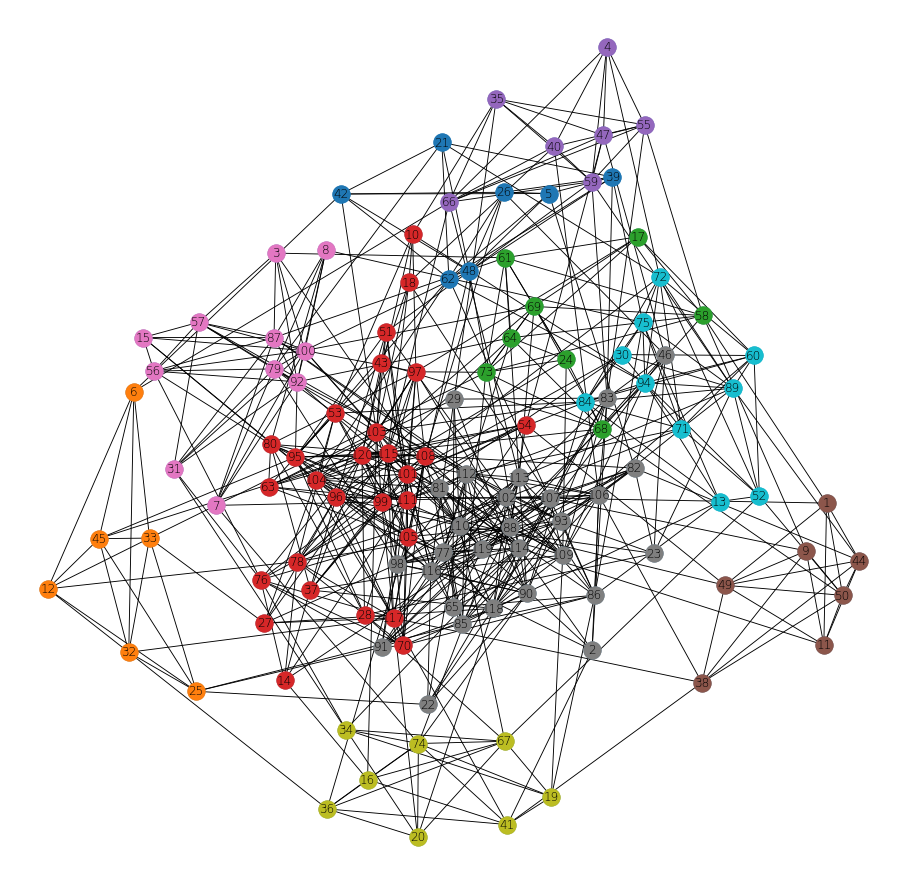

In [4]:
fig, ax = plt.subplots(1,1,figsize=(16,16))

## Read network
data = pd.read_csv(path + n_file, sep = "\t", header = None)
data.head()
## Create network
G = nx.from_pandas_edgelist(data, 0, 1)
## Separate nodes
nCom = comm.max()
coms = [[]]*int(nCom)
for row in comm.iterrows():
    coms[int(row[1]-1)] = coms[int(row[1]-1)] + [int(row[0])]
## Create graph
G3 = nx.Graph()
for i in range(1,comm.shape[0]):
    G3.add_node(i)
for row in data.iterrows():
    G3.add_edge(row[1][0],row[1][1])
## Get position
pos_new = nx.spring_layout(G3)
## Draw network
nx.draw(G3, pos_new, edge_color='k',  with_labels=True,
                 font_weight='light', node_size= 280, width= 0.9, ax=ax)
## Label nodes
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
for i,com in enumerate(coms):
    nx.draw_networkx_nodes(G3, pos = pos_new, nodelist = com, node_color = colors[i], ax=ax)

plt.show()